In [208]:
import pandas as pd
import numpy as np
import math 
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import sympy
import seaborn as sns
%matplotlib inline

In [209]:
binomial12 = pd.read_csv('Binomial12.csv')
binomial12 = binomial12.append(pd.Series([np.NaN, np.NaN, np.NaN], index=['Binomial', 'Normal', 'Uniform']), ignore_index = True)
# binomial12 our given csv file in dataframe format
# we appended a row of NaN values in order to make our clean_Series function work

In [210]:
binomial_variance = .81
Binomial = pd.Series(binomial12['Binomial']) # Separate the distributions  
Normal = pd.Series(binomial12['Normal'])     # into their own series
Uniform = pd.Series(binomial12['Uniform'])

Here I create a function to clean up the series we end up with from this dataset:

In [211]:
def clean_Series(ser):
    last_val = 0
    for i in range(2, ser.size):
        if pd.isnull(ser[i]):
            last_val = i
            break
    ser = (pd.Series(data = ser[2:last_val].values)).apply(int)
    return ser

In [212]:
Binomial = clean_Series(Binomial)
Normal = clean_Series(Normal)
Uniform = clean_Series(Uniform)

# Part A

## A.1

#### For the type of distribution presented in the first column, plot a histogram (normalized to unit area) of the data.

Our distribution is binomial, so we must create the appropriate histogram

1: Find our range for the dataset

In [213]:
a = Binomial.min()
a # our minimum

0

In [214]:
b = Binomial.max()
b # our maximum

5

Now, Dr. Kleinhenz suggested we intially try shifting a and b such that a < eXi < b, so we will extend the range by 1

In [215]:
a -=.5
b += .5

In [216]:
a

-0.5

In [217]:
b

5.5

2: we must select a width, w, and a number of bins, n such that: nw = b - a

for a dataset of all integers, we typically pick w to be 1

In [218]:
w = 1

In [219]:
n = (b - a) / w
n

6.0

3: Each data point Xi can be represented as follows:

Xi = a + kw + ew

where *a* is the left edge of the interval, *w* is the bin width, *k* is the number of whole bins between *a* and *Xi*, and 0 <= ew <= w with 0 <= e <= 1 is a fraction of a bin.

divide the equation by *w* to get:

*(Xi - a)/w = k + e*

Since 0 <= e <= 1 and k is an integer it must be that

*k* = [ *(Xi - a)/w* ]

In [229]:
k = ((Binomial - a) / w).apply(math.floor)
# k is our number of whole bins between between a and Xi

In [221]:
BinomialDF = pd.DataFrame(Binomial, columns = ['Binomial'])
BinomialDF['k'] = k
# BinomialDF is our DataFrame containing the original Binomial dataset and our 
# new k values

4: Each time Xi falls into some bin k, we must place a rectangle over the bin base that has a height *h* and width *w* (same as bin width)

The total area under all such rectangles is A = whN 

where N is the total number of sample points

we normalize A = 1 to set h

h = 1 / (wN)

In [222]:
N = Binomial.size
N

1200

In [223]:
h = 1 / (w * N)
h

0.0008333333333333334

In [224]:
BinomialDF['Histogram'] = pd.Series(BinomialDF['k'].value_counts())
# BinomialDF with a Histogram column

In [225]:
BinomialDF['Histogram Normalized to Unit Area'] = pd.Series(
    BinomialDF['Histogram'] * h)
# BinomialDF with our Histogram normalized

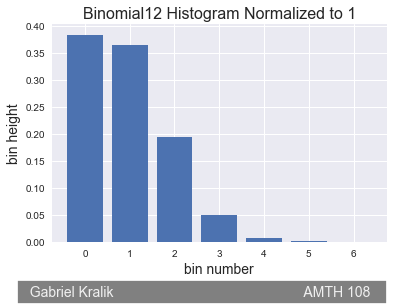

In [226]:
y = np.array(BinomialDF['Histogram Normalized to Unit Area'][0:6])
y = np.append(y, 0)
x = [0,1,2,3,4,5,6]
import matplotlib.style as style
#style.use('fivethirtyeight')
plt.bar(x,y)
plt.xlabel('bin number', fontsize=14)
plt.ylabel('bin height', fontsize=14)
plt.title('Binomial12 Histogram Normalized to 1', fontsize=16)
plt.text(x = -1.4, y=-.1, s='  Gabriel Kralik                                                 AMTH 108   '   ,
         fontsize=14, color='#f0f0f0', backgroundcolor='grey')
plt.show()

## A.2

Estimate the mean and the variance for the column A distribution. For comparison, the
exact variance is given in the cell labelled (here) Distribution Variance.

In [179]:
var_act = .81 # our given distribution's actual variance

In [180]:
mu_est = Binomial.mean()
mu_est # our mean

0.9358333333333333

In [181]:
var_est = Binomial.var()
var_est

0.8540943842090464

In [182]:
abs((1 - var_est/var_act) * 100) # our % error in estimating variance

5.443751136919306

## A.3

The distribution found in the first column depends on two parameters as follows:

Binomial Distribution : *n* and *p*

Estimate the two parameters and determine a 96% confidence interval around each parameter

We know that the mean for a binomial is *np*

We also know that the variance for a binomial is *np*(1-*p*)

So we can estimate *np*(1-*p*) = var_est

If we substitute mu_est for *np*, we get mu_est(1-*p*) = var_est and can solve for *p*

In [254]:
p = 1 - (var_act / mu_est)
p # our estimated p value for a binomial 

0.13446126447016915

In [255]:
n = mu_est / p
n # our estimated n value for a binomial 

6.959873068432673

Now, we must obtain a 96% confidence interval around these parameters

Since we have a known variance (.81) and a large number of samples (1200), we can use the confidence interval around mu and apply it to each parameter

We know to get a (1 - alpha)100% confidence interval around mu, we can use                         
mu +- Z(alpha/2)(standard_deviation/N)

In [256]:
alpha = .04
alpha

0.04

In [257]:
Z = norm.ppf(1 - alpha / 2)
Z # our Z(alpha/2)vc

2.0537489106318225

In [258]:
std_dev = math.sqrt(var_act)
std_dev # our standard deviation

0.9

In [259]:
R = (mu_est + Z * (std_dev / math.sqrt(N)))
R # our upper bound mean

0.98919129522138649

In [260]:
L = (mu_est - Z * (std_dev / math.sqrt(N)))
L # our lower bound for mean

0.8824753714452801

So, we can say that our has a 96% chance of lying in the range         
[0.8824753714452801, 0.98919129522138649]

With this information, we can estimate the same 96% confidence interval by taking p's lower bound to be 1 - (variance / (mean lower bound) 

In [261]:
p_L = 1 - (var_act / L )
p_L # our lower bound for p

0.082127358780090365

In [262]:
p_R = 1 - (var_act / R)
p_R # our upper bound for p

0.18114928435685684

In [263]:
p # p

0.13446126447016915

Now we estimate the confidence interval for n by n = mean_bound / p_bound

In [264]:
n_R = L / p_L
n_R

10.745205794432698

In [265]:
n_L = R / p_R
n_L

5.4606414744245919

In [266]:
n

6.959873068432673

So our confidence interval for *n* is [5.4606414744245919, 10.745205794432698]

## A.4

How large a data set is needed to get 96% confidence intervals of width 0.01 or smaller around the two parameters (Assume X and S^2 do not change significantly with *N* when *N* is large.)

First we'll look at the width of P's confidence interval

The width of P's confidence interval is p_R - p_L, if we replace it with its mean bounds is:                       

1 - (var_act / R) - (1 - (var_act / L ))

which becomes   

(1 - (var_act / (mu_est + Z * (std_dev / math.sqrt(N))))) - (1 - (var_act / (mu_est - Z * (std_dev / math.sqrt(N))))) = 0.099021925576766479

we want this width to become .01

In [267]:
p_width = p_R - p_L
p_width

0.099021925576766479

In [268]:
num = 1200
count = 1 # arbitrary assignment for the first loop since python has no 'do while'
while count > .01:
    num += 1
    count = (1 - (var_act / (mu_est + Z * (std_dev / math.sqrt(num))))) - (1 - (var_act / (mu_est - Z * (std_dev / math.sqrt(num)))))
    
print('num: ' + str(num))
print('count: ' + str(count))

num: 116909
count: 0.00999996243817


The number of data points to get a confidence interval of width .01 for our *p* value is 1116909

Now, we must try to obtain that confidence interval width for *n*

n_R - n_L = 5.2845643200081058

If we do the same to n_R - n_L as we did with *p*'s confidence interval, we obtain the width expression:

((mu_est - Z(std_dev / math.sqrt(N))) / (1 - (var_act / (mu_est - Z(std_dev / math.sqrt(N)))))) - ((mu_est + Z(std_dev / math.sqrt(N))) / (1 - (var_act / (mu_est + Z(std_dev / math.sqrt(N))))))

and we wish to set it equal to .01 

In [269]:
numn = 116909 
countn = 1
countt = 2
while countn > .01:
    countt += 1
    numn = 116909*countt
    countn = ((mu_est - Z * (std_dev / math.sqrt(numn))) / (1 - (var_act / (mu_est - Z * (std_dev / math.sqrt(numn)))))) - ((mu_est + Z * (std_dev / math.sqrt(numn))) / (1 - (var_act / (mu_est + Z * (std_dev / math.sqrt(numn))))))
    
    
countn

0.0099981899343148939

Here we find that 223530008 is a suitable large enough number of data samples to provide us with a 96% confidence interval around *n* with a width of .01

## A.5 

#### Plot a graph of the density function for the distribution in column A using the estimated parameter values determined in part A.3. Compare this graph to your normalized histogram.

In [270]:
def binom_func(n,p,x):
    return int(sympy.binomial(n, x)) * (p**x) * ((1-p)**(n-x))
    
nummmms = 6
binom_arr = np.linspace(0, 6, num=nummmms)
binom_arr2 = np.linspace(0, 6,num=nummmms)
for i in range(nummmms):
    binom_arr2[i] = binom_func(n,p,binom_arr[i])
binom_arr2

array([  3.66034533e-01,   3.52644723e-01,   1.13248240e-01,
         1.61637832e-02,   1.10545526e-03,   3.08700551e-05])

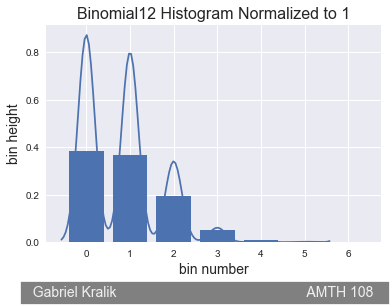

In [282]:
new_x = np.random.binomial(n, p, 1200) # we generate 1200 random binomial 
sns.distplot(new_x,hist=False );    
plt.bar(x,y)
plt.xlabel('bin number', fontsize=14)
plt.ylabel('bin height', fontsize=14)
plt.title('Binomial12 Histogram Normalized to 1', fontsize=16)
plt.text(x = -1.4, y=-.23, s='  Gabriel Kralik                                                 AMTH 108   '   ,
         fontsize=14, color='#f0f0f0', backgroundcolor='grey')
plt.show()# varialbes with parameters n, p

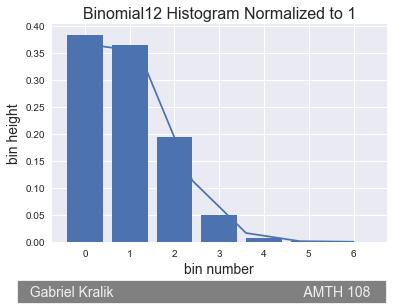

In [285]:
plt.plot(binom_arr, binom_arr2)
plt.bar(x,y)
plt.xlabel('bin number', fontsize=14)
plt.ylabel('bin height', fontsize=14)
plt.title('Binomial12 Histogram Normalized to 1', fontsize=16)
plt.text(x = -1.4, y=-.1, s='  Gabriel Kralik                                                 AMTH 108   '   ,
         fontsize=14, color='#f0f0f0', backgroundcolor='grey')
plt.show()# varialbes with parameters n, p

In [273]:
n

6.959873068432673

In [274]:
p

0.13446126447016915